In [3]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plot
og_image = Image.open("1.jpg")
# gray_image = ImageOps.grayscale(og_image)
# gray_image.save("img111.jpg")
y=plot.imread("1.jpg")
print(y[:,:,2].shape)


(256, 384)


In [22]:
og_image = Image.open("imm.jpeg")
y1=plot.imread("imm.jpeg")

(258, 196)


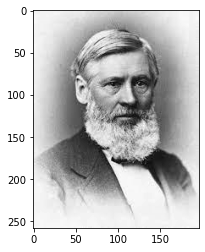

In [23]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plot
og_image = Image.open("téléchargement.jpg")
x=plot.imread("img1.jpg")
gray_image = ImageOps.grayscale(og_image)
gray_image.save("img11.jpg")
x111=plot.imread("img11.jpg")
w=x.shape
print(x111.shape)
plot.imshow(x111,cmap="gray")

In [5]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plot
og_image = Image.open("1.jpg")
# gray_image = ImageOps.grayscale(og_image)
# gray_image.save("img111.jpg")
y=plot.imread("1.jpg")
print(y.shape)
# print(y.flatten())
# z=y.flatten()
# print(np.array([z]).shape)
# x11=np.array(z).reshape((256, 384,3))
# plot.imshow(x11)

(256, 384, 3)


In [6]:
def zegzag_gray(matrix):
    sh=np.shape(matrix)
    solution=[[] for i in range(sh[0]+sh[1]-1)]
    for i in range(sh[0]):
        for j in range(sh[1]):
            sum=i+j
            if(sum%2 ==0):
                solution[sum].insert(0,matrix[i][j])
            else:
                solution[sum].append(matrix[i][j])
    return solution,sh

In [17]:
def zegzag_RGB(matrix):
    sh=np.shape(matrix)
    c=[]
    for k in range(0,sh[2]):
        solution=[[] for i in range(sh[0]+sh[1]-1)]
        for i in range(sh[0]):
            for j in range(sh[1]):
                sum=i+j
                if(sum%2 ==0):
                    solution[sum].insert(0,matrix[:,:,k][i][j])
                else:
                    solution[sum].append(matrix[:,:,k][i][j])
        c.append(solution)
    return c,sh
z=zegzag_RGB(y1)
# print(z[0])

0
1
2


In [18]:
def codage_zigzag(img):
    shp=img.shape
    if len(shp)>2:
        return zegzag_RGB(img)
    else:
         return zegzag_gray(img)
v=codage_zigzag(y1) 
# print(v[0])

0
1
2


In [9]:
def trie(solution):
    L=[]
    c=0
    for i in range(0,len(solution)):
        if i%2==0:
            x=solution[i][::-1]
            L.append(x)
        else:
            L.append(solution[i])
    mx=len(L[0])
    for i in range(1,len(L)):
        if mx<=len(L[i]):
            mx=len(L[i])
    return L,mx

In [10]:
def decodage_zigzagCL(b,mx,sh):
    m=np.zeros((sh[0], sh[1]))
    k=sh[1]-sh[0];x=0;v=0
    m[0][0]=b[0][0]
    for i in range(1,len(b)-1):
        v=0
        for j in range(0,len(b[i])):
            if i<mx :
                m[j][len(b[i])-1-j]=b[i][j]
            elif len(b[i])==mx and i>=mx:
                m[j][len(b[i])-j+x]=b[i][j]
                v+=1
                if v==len(b[i]) :
                    x+=1
            elif len(b[i])<mx and i>=mx+1:
                n=(mx-1-len(b[i])+k)
                m[i-len(b[i])+j-n][len(b[i])-j+n]=b[i][j]
    m[sh[0]-1][sh[0]-1]=b[len(b)-1][0]
    return m

In [11]:
def decodage_zigzag(b,mx,sh):
    m=np.zeros((sh[0], sh[1]))
    x=0;v=0
    m[0][0]=b[0][0]
    for i in range(1,len(b)-1):
        v=0
        for j in range(0,len(b[i])):
            if i<mx :
                m[j][len(b[i])-1-j]=b[i][j]
            elif len(b[i])==mx and i>=mx:
                m[j][len(b[i])-j+x]=b[i][j]
                v+=1
                if v==len(b[i]) :
                    x+=1
            elif len(b[i])<mx and i>=mx+1:
                n=(mx-1-len(b[i]))
                m[i-len(b[i])+j-n][len(b[i])-j+n]=b[i][j]
            elif len(b[i])==mx-1 and i==mx:
                m[i-len(b[i])+j][len(b[i])-j]=b[i][j]
    m[sh[0]-1][sh[1]-1]=b[len(b)-1][0]
    return m

In [12]:
def decodage_zigzagLC(b,mx,sh):
    m=np.zeros((sh[0], sh[1]))
    x=1;v=0
    m[0][0]=b[0][0]
    for i in range(1,len(b)-1):
        v=0
        for j in range(0,len(b[i])):
            if i<mx :
                m[j][len(b[i])-1-j]=b[i][j]
            elif len(b[i])==mx and i>=mx:
                m[j+x][len(b[i])-j-1]=b[i][j]                
                v+=1
                if v==len(b[i]) :
                    x+=1
            elif len(b[i])<mx and i>=mx:
                n=(mx-1-len(b[i]))
                m[i-len(b[i])+j-n][len(b[i])-j+n]=b[i][j]
    m[sh[0]-1][sh[1]-1]=b[len(b)-1][0]
    return m

In [21]:
def decodage_zigzag(l_zig):
    shp=l_zig[1]
    c=[]
    if len(shp)>2:
        if shp[0]>shp[1]:
            for i in range(len(l_zig[0])):
                b=decodage_zigzagLC(trie(l_zig[0][i])[0],trie(l_zig[0][i])[1],shp)
                c.append(Image.fromarray(b.astype(np.uint8)))
        elif shp[0]<shp[1]:
            for i in range(len(l_zig[0])):
                b=decodage_zigzagCL(trie(l_zig[0][i])[0],trie(l_zig[0][i])[1],shp)
                c.append(Image.fromarray(b.astype(np.uint8)))
        else:
             for i in range(len(l_zig[0])):
                b=decodage_zigzag(trie(l_zig[0][i])[0],trie(l_zig[0][i])[1],shp)
                c.append(Image.fromarray(b.astype(np.uint8)))
        return c
    else:
        if shp[0]>shp[1]:
            b=decodage_zigzagLC(trie(l_zig[0])[0],trie(l_zig[0])[1],shp)
            c.append(Image.fromarray(b.astype(np.uint8)))
        elif shp[0]<shp[1]:
            b=decodage_zigzagLC(trie(l_zig[0])[0],trie(l_zig[0])[1],shp)
            c.append(Image.fromarray(b.astype(np.uint8)))
        else:
            b=decodage_zigzag(trie(l_zig[0])[0],trie(l_zig[0])[1],shp)
            c.append(Image.fromarray(b.astype(np.uint8)))
        return c
            
    
c=decodage_zigzag(v)